**FOOTBALLER MARKET VALUE PREDICTION **

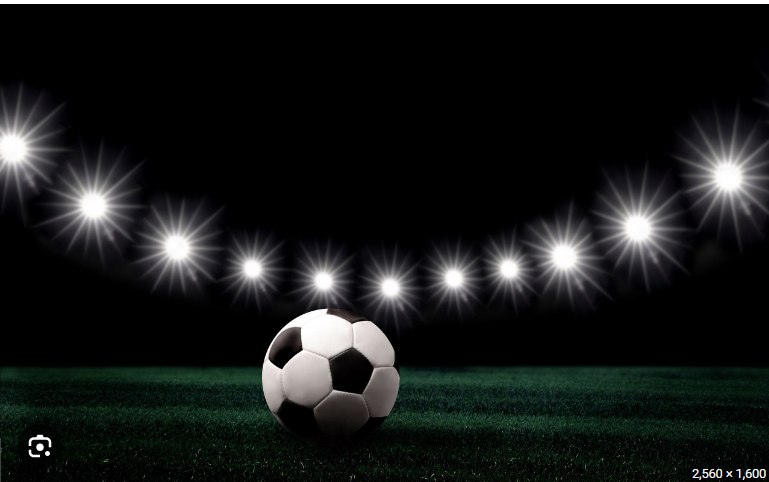**MUSKETS TEAM DATA**

FOOTBALLER'S MARKET VALUE PREDICTION MODEL

In [2]:
import pandas as pd #for dataframes
import numpy as np #for arrays
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for data visualization

DATA PREPROCESSING




*   Removed unnecessary columns; 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'PlayerUrl'


*   Filled the  null values

*   Renamed some columns




*   Converted Weight, IR and Height Columns to integers


*   Converted Value, Wage, Hits and Release Clause columns to float values
*   Unpacked the 'Positions' column into as many columns as there are positions and assign Boolean value


*   	Created 5 new categorical columns for the Height, Weight, Release Clause, Value and Wage into which I convert the respective values into clusters/labels as follows

     Wage: bucket intervals of 50K

     Value: bucket intervals of 50M

     Release Clause: bucket intervals of 50M



*   Created a new column 'Player_Club' from Club
*   Made a new column 'Position_count'
to get the total number of positions played by each player

*   Created a new column 'Player_Status' from 'Contract' column to display whether a player is Active, Free or On Loan


















In [3]:
#import data and display it
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Muskets_teamData_V2.csv")


<ipython-input-3-cd73922d13ee>:2: DtypeWarning: Columns (26,29,76) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Muskets_teamData_V2.csv")


In [ ]:
pd.set_option("display.max_columns", None)
data.head() #first 5 rows

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,1-Jul-04,NaN,€103.5M,€560K,€138.4M,429.0,85.0,95.0,70.0,91,88.0,470.0,96,93.0,94.0,91.0,96.0,451.0,91.0,80.0,91.0,94.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44,40.0,93.0,95,75.0,96.0,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8,2231.0,466,4 ★,4★,Medium,Low,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,10-Jul-18,NaN,€63M,€220K,€75.9M,437.0,84.0,95.0,90.0,82,86.0,414.0,88,81.0,76.0,77.0,92.0,431.0,87.0,91.0,87.0,95.0,71.0,444.0,94.0,95.0,84.0,78.0,93.0,353.0,63,29.0,95.0,82,84.0,95.0,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11,2221.0,464,4 ★,5★,High,Low,5 ★,89.0,93.0,81.0,89.0,35.0,77.0,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,16-Jul-14,NaN,€120M,€125K,€159.4M,95.0,13.0,11.0,15.0,43,13.0,109.0,12,13.0,14.0,40.0,30.0,307.0,43.0,60.0,67.0,88.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34,19.0,11.0,65,11.0,68.0,57.0,27.0,12.0,18.0,437.0,87.0,92.0,78.0,90.0,90,1413.0,489,3 ★,1★,Medium,Medium,3 ★,87.0,92.0,78.0,90.0,52.0,90.0,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,30-Aug-15,NaN,€129M,€370K,€161M,407.0,94.0,82.0,55.0,94,82.0,441.0,88,85.0,83.0,93.0,92.0,398.0,77.0,76.0,78.0,91.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,408.0,76,66.0,88.0,94,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13,2304.0,485,5 ★,4★,High,High,4 ★,76.0,86.0,93.0,88.0,64.0,78.0,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,3-Aug-17,NaN,€132M,€270K,€166.5M,408.0,85.0,87.0,62.0,87,87.0,448.0,95,88.0,89.0,81.0,95.0,453.0,94.0,89.0,96.0,91.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51,36.0,87.0,90,92.0,93.0,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11,2175.0,451,5 ★,5★,High,Medium,5 ★,91.0,85.0,86.0,94.0,36.0,59.0,595


In [ ]:
data.tail() #last 5 rows

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
19016,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47.0,55.0,\n\n\n\nWuhan Zall,...,Medium,Medium,1 ★,64.0,28.0,26.0,38.0,48.0,51.0,NaN
19017,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47.0,67.0,\n\n\n\nOldham Athletic,...,Medium,Medium,1 ★,64.0,40.0,48.0,49.0,35.0,45.0,NaN
19018,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47.0,65.0,\n\n\n\nDerry City,...,Medium,Medium,1 ★,63.0,39.0,44.0,46.0,40.0,53.0,NaN
19019,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47.0,57.0,\n\n\n\nDalian YiFang FC,...,Medium,Medium,1 ★,58.0,49.0,41.0,49.0,30.0,44.0,NaN
19020,252520,Zhou Xiao,Xiao Zhou,https://cdn.sofifa.com/players/252/520/21_60.png,http://sofifa.com/player/252520/xiao-zhou/210006/,China PR,21,47.0,57.0,\n\n\n\nDalian YiFang FC,...,Medium,Medium,1 ★,62.0,22.0,39.0,42.0,45.0,55.0,NaN


In [ ]:
data.columns #displays all the columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits

In [4]:
#drop all unecessary columns
data.drop(["playerUrl"], axis=1, inplace=True)
data.drop(["Finishing"], axis=1, inplace=True)
data.drop(["Heading Accuracy"], axis=1, inplace=True)
data.drop(["Short Passing"], axis=1, inplace=True)
data.drop(["Volleys"], axis=1, inplace=True)
data.drop(["Dribbling"], axis=1, inplace=True)
data.drop(["Curve"], axis=1, inplace=True)
data.drop(["FK Accuracy"], axis=1, inplace=True)
data.drop(["Long Passing"], axis=1, inplace=True)
data.drop(["Ball Control"], axis=1, inplace=True)
data.drop(["Movement"], axis=1, inplace=True)
data.drop(["Acceleration"], axis=1, inplace=True)
data.drop(["Sprint Speed"], axis=1, inplace=True)
data.drop(["Agility"], axis=1, inplace=True)
data.drop(["Reactions"], axis=1, inplace=True)
data.drop(["Balance"], axis=1, inplace=True)
data.drop(["Power"], axis=1, inplace=True)
data.drop(["Shot Power"], axis=1, inplace=True)
data.drop(["Jumping"], axis=1, inplace=True)
data.drop(["Stamina"], axis=1, inplace=True)
data.drop(["Strength"], axis=1, inplace=True)
data.drop(["Long Shots"], axis=1, inplace=True)
data.drop(["Mentality"], axis=1, inplace=True)
data.drop(["Aggression"], axis=1, inplace=True)
data.drop(["Interceptions"], axis=1, inplace=True)
data.drop(["Positioning"], axis=1, inplace=True)
data.drop(["Vision"], axis=1, inplace=True)
data.drop(["Penalties"], axis=1, inplace=True)
data.drop(["Composure"], axis=1, inplace=True)
data.drop(["Defending"], axis=1, inplace=True)
data.drop(["Marking"], axis=1, inplace=True)
data.drop(["Standing Tackle"], axis=1, inplace=True)
data.drop(["Sliding Tackle"], axis=1, inplace=True)
data.drop(["Goalkeeping"], axis=1, inplace=True)
data.drop(["GK Diving"], axis=1, inplace=True)
data.drop(["GK Handling"], axis=1, inplace=True)
data.drop(["GK Kicking"], axis=1, inplace=True)
data.drop(["GK Positioning"], axis=1, inplace=True)
data.drop(["GK Reflexes"], axis=1, inplace=True)
data.drop(["Total Stats"], axis=1, inplace=True)
data.drop(["Base Stats"], axis=1, inplace=True)
data.drop(["W/F"], axis=1, inplace=True)
data.drop(["SM"], axis=1, inplace=True)
data.drop(["A/W"], axis=1, inplace=True)
data.drop(["D/W"], axis=1, inplace=True)
data.drop(["PAC"], axis=1, inplace=True)
data.drop(["SHO"], axis=1, inplace=True)
data.drop(["PAS"], axis=1, inplace=True)
data.drop(["DRI"], axis=1, inplace=True)
data.drop(["DEF"], axis=1, inplace=True)
data.drop(["PHY"], axis=1, inplace=True)
data.drop(["Crossing"], axis=1, inplace=True)
data.drop(["photoUrl"], axis=1, inplace=True)
data.drop(["Attacking"], axis=1, inplace=True)
data.drop(["BOV"], axis=1, inplace=True)
data.drop(["Loan Date End"], axis=1, inplace=True)
data.drop(["Preferred Foot"], axis=1, inplace=True)


In [ ]:
#to check for duplicates
duplicates=data.duplicated().sum()
duplicates
#There are no duplicates

0

In [ ]:
data.columns  #To display the columns left

Index(['ID', 'Name', 'Full Name', 'Nationality', 'Age', 'Overall Rating',
       'Potential', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Best Position', 'Joined', 'Market Value', 'Wage', 'Release Clause',
       'International Rating', 'Profile Hits'],
      dtype='object')

In [5]:
#To rename a few columns
data.rename({"↓OVA":"Overall Rating"}, axis=1, inplace=True)
data.rename({"LongName":"Full Name"}, axis=1, inplace=True)
data.rename({"POT":"Potential"}, axis=1, inplace=True)
data.rename({"IR":"International Rating"}, axis=1, inplace=True)
data.rename({"Value":"Market Value"}, axis=1, inplace=True)
data.rename({"Hits":"Profile Hits"}, axis=1, inplace=True)


In [ ]:
data.info() #general info on dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    19021 non-null  int64  
 1   Name                  19021 non-null  object 
 2   Full Name             19021 non-null  object 
 3   Nationality           19021 non-null  object 
 4   Age                   19021 non-null  int64  
 5   Overall Rating        19019 non-null  float64
 6   Potential             19020 non-null  float64
 7   Club                  19021 non-null  object 
 8   Contract              19021 non-null  object 
 9   Positions             19021 non-null  object 
 10  Height                19021 non-null  object 
 11  Weight                19020 non-null  object 
 12  Best Position         19021 non-null  object 
 13  Joined                19021 non-null  object 
 14  Market Value          19021 non-null  object 
 15  Wage               

In [ ]:
data.describe(include=object).T #displays statistical information about categorical columns

,count,unique,top,freq
Name,19021,17920,J. Rodríguez,13
Full Name,19021,18852,Adama Traoré,3
Nationality,19021,164,England,1712
Club,19021,682,No Club,237
Contract,19021,131,2019 ~ 2021,1710
Positions,19021,640,CB,2445
Height,19021,62,180cm,1477
Weight,19020,79,70kg,1496
Best Position,19021,15,CB,3691
Joined,19021,1869,1-Jul-19,1347


In [ ]:
data.describe() #displays statistical information about numerical columns

,ID,Age,Overall Rating,Potential,Skill
count,19021.000000,19021.000000,19019.000000,19020.000000,19015.000000
mean,226424.369907,25.191052,65.710027,71.133176,256.449382
std,27130.054102,4.709833,6.961705,6.114062,78.591672
min,41.000000,16.000000,47.000000,47.000000,40.000000
25%,210182.000000,21.000000,61.000000,67.000000,222.000000
50%,232437.000000,25.000000,66.000000,71.000000,269.000000
75%,246929.000000,29.000000,70.000000,75.000000,310.000000
max,259216.000000,53.000000,93.000000,95.000000,470.000000


In [ ]:
#display null values
pd.set_option("display.max_rows", None)
data.isnull().sum()

ID                         0
Name                       0
Full Name                  0
Nationality                0
Age                        0
Overall Rating             2
Potential                  1
Club                       0
Contract                   0
Positions                  0
Height                     0
Weight                     1
Best Position              0
Joined                     0
Market Value               0
Wage                       0
Release Clause             3
Skill                      6
International Rating       0
Profile Hits            2595
dtype: int64

In [6]:
#To fill null numerical values with the mean
data.fillna(value=data["Overall Rating"].mean(), inplace=True)
data.fillna(value=data["Potential"].mean(), inplace=True)
data.fillna(value=data["Skill"].mean(), inplace=True)

In [7]:
#To fill null Weight values with the mode 70kg
data["Weight"].mode()
data.loc[data["Weight"].isnull()==True, "Weight"]='70kg'

#To fill null Release Clause values with the mode €0
data["Release Clause"].mode()
data.loc[data["Release Clause"].isnull()==True, "Release Clause"]="€0"

#To fill null Profile Hits values with the mode
data["Profile Hits"].mode()
data.loc[data["Profile Hits"].isnull()==True, "Profile Hits"]=" Null"


In [ ]:
data.head()

In [ ]:
pd.set_option("display.max_rows", None)
data.isnull().sum()

ID                      0
Name                    0
Full Name               0
Nationality             0
Age                     0
Overall Rating          0
Potential               0
Club                    0
Contract                0
Positions               0
Height                  0
Weight                  0
Best Position           0
Joined                  0
Market Value            0
Wage                    0
Release Clause          0
Skill                   0
International Rating    0
Profile Hits            0
dtype: int64

In [8]:
#To remove 'kg' to make it easier to convert values to integer
data['Weight']=data['Weight'].str.replace('kg','')



In [9]:
#To detect Nan values and replacing them with the mode to make it easier to convert values to integer
data.loc[data["Weight"].isna()==True, "Weight"]='70'

In [ ]:
#To make sure nothing is preventing the change in data type of the weight column
data["Weight"].unique()

array(['72', '83', '87', '70', '68', '80', '71', '91', '73', '85', '92',
       '69', '84', '96', '81', '82', '75', '86', '89', '74', '76', '64',
       '78', '90', '66', '60', '94', '79', '67', '65', '59', '61', '93',
       '88', '97', '77', '62', '63', '95', '100', '58', '183lbs',
       '179lbs', '172lbs', '196lbs', '176lbs', '185lbs', '170lbs',
       '203lbs', '168lbs', '161lbs', '146lbs', '130lbs', '190lbs',
       '174lbs', '148lbs', '165lbs', '159lbs', '192lbs', '181lbs',
       '139lbs', '154lbs', '157lbs', '163lbs', '98', '103', '99', '102',
       '56', '101', '57', '55', '104', '107', '110', '53', '50', '54',
       '52'], dtype=object)

In [10]:
#To convert values measured in lbs to kg using a for loop
for index, row in data.iterrows():
  num=row["Weight"]
  num=str(num)
  if 'lbs' in num:
    num=num.replace('lbs','')
    new_num=float(num)
    new_num=int(new_num*0.454)
  else:
    new_num=int(num)
  data.at[index, 'Weight']=new_num

In [ ]:
#To make sure nothing is preventing the change in data type of the height column
data["Height"].unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

In [ ]:
data["Height"]

In [11]:
#To remove 'cm' and replace '"" to make it easier to convert values to integer
data["Height"]=data["Height"].str.replace('cm','')
data["Height"]=data["Height"].str.replace("'",".")
data["Height"]=data["Height"].str.replace('"','')


In [12]:
#To change values measured in inches to cm
for index, row in data.iterrows():
  num=str(row["Height"])
  if '.' in num:
    num=num.replace(".",'') #To separate the feet from the inches
    feet=num[0]
    feet=int(feet)*12
    inches=num[1:]
    inches=int(inches)
    new_num=feet + inches
    new_num=new_num*2.54
    new_num=round(new_num,2)

  else:
    new_num=int(num)
    new_num=round(new_num,2)
  data.at[index, "Height"]=new_num



In [13]:
#To convert Height column to integer
data["Height"]=data["Height"].astype(int)


In [ ]:
data["International Rating"].unique()

array(['5 ★', '3 ★', '4 ★', '2 ★', '1 ★'], dtype=object)

In [14]:
#To convert International Rating to integer
data["International Rating"]=data["International Rating"].str.replace('★','')
data["International Rating"]=data["International Rating"].astype(int)


In [15]:
#To extract values from 'POSITIONS' column

#To store unique values from the positions column in a list

positions=data['Positions'].unique()
positions=list(positions)
positions

['RW, ST, CF',
 'ST, LW',
 'GK',
 'CAM, CM',
 'LW, CAM',
 'ST',
 'RW',
 'ST, LW, RW',
 'CB',
 'LW',
 'CDM',
 'CF, ST',
 'LW, RW',
 'CDM, CM',
 'CDM, RB',
 'CF, CAM',
 'LW, ST',
 'CM',
 'ST, CF, LW',
 'RM, LM, CAM',
 'RB',
 'RW, CAM, CM',
 'LB',
 'LM, CF',
 'CF',
 'RW, LW',
 'CAM, RM, RW',
 'CM, CDM',
 'CAM, CF, ST',
 'CM, CDM, CAM',
 'CF, LW, CAM',
 'CAM, RM, CF',
 'LM, ST',
 'RM, LM, RW',
 'LM',
 'CAM, RW',
 'CB, CDM',
 'RW, RM',
 'LW, CF',
 'CM, RM, LM',
 'LB, LM',
 'CAM, CM, RM',
 'CAM, CM, CF',
 'CAM, CF',
 'LM, RM, LW',
 'LM, LB, CM',
 'CM, LM, LB',
 'RM, RW',
 'RM, CM',
 'CAM, CM, LW',
 'CB, LB',
 'RM, RB',
 'ST, RW',
 'LM, RW, LW',
 'RB, LB',
 'RB, RM',
 'RM',
 'LM, RM, CF',
 'CAM, RM',
 'RB, RWB',
 'CDM, CB, CM',
 'CAM, RM, ST',
 'LM, LW, RM',
 'CM, CAM',
 'ST, RM, CF',
 'LM, RM',
 'RM, CF',
 'LM, LWB',
 'RW, RM, CF',
 'RB, CM',
 'LW, CAM, RW',
 'CAM, LW, CM',
 'CM, CAM, CDM',
 'RW, LW, CAM',
 'CM, CAM, LM',
 'CM, RM, ST',
 'CDM, CM, RB',
 'ST, CAM',
 'CAM, LW, ST',
 'LB, CB, L

In [16]:
#To store the values from the list in a set(to get rid of repetition)
unique_position=set()
for position in positions:
    u_position=position.split(',')
    unique_position.update(u_position)
unique_position

{' CAM',
 ' CB',
 ' CDM',
 ' CF',
 ' CM',
 ' LB',
 ' LM',
 ' LW',
 ' LWB',
 ' RB',
 ' RM',
 ' RW',
 ' RWB',
 ' ST',
 'CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'GK',
 'LB',
 'LM',
 'LW',
 'LWB',
 'RB',
 'RM',
 'RW',
 'RWB',
 'ST'}

In [17]:
#To create new columns for each position
data['CAM']=''
data['CB']=''
data['CDM']=''
data['CF']=''
data['CM']=''
data['LB']=''
data['LM']=''
data['LWB']=''
data['RW']=''
data['RM']=''
data['RB']=''
data['RWB']=''
data['ST']=''
data['GK']=''

data.head()

,ID,Name,Full Name,Nationality,Age,Overall Rating,Potential,Club,Contract,Positions,...,CM,LB,LM,LWB,RW,RM,RB,RWB,ST,GK
0,158023,L. Messi,Lionel Messi,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",...,,,,,,,,,,
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92.0,92.0,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",...,,,,,,,,,,
2,200389,J. Oblak,Jan Oblak,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,...,,,,,,,,,,
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91.0,91.0,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",...,,,,,,,,,,
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",...,,,,,,,,,,


In [18]:
#To store the boolean values, 1 for True and 0 for False
for index, row in data.iterrows():
  pos=str(row['Positions'])
  if 'CAM'in pos:
    stat='1'
  else:
    stat='0'
  data.at[index, 'CAM']=stat
  if 'CB' in pos:
    stat='1'
  else:
    stat='0'
  data.at[index, 'CB']=stat
  if 'CDM' in pos:
    stat='1'
  else:
    stat='0'
  data.at[index, 'CDM']=stat
  if 'CF' in pos:
    stat='1'
  else:
    stat='0'
  data.at[index, 'CF']=stat
  if 'CM' in pos:
    stat='1'
  else:
    stat='0'
  data.at[index, 'CM']=stat


In [19]:
#To store the boolean values, 1 for True and 0 for False
for index, row in data.iterrows():
  pos=str(row['Positions'])
  if 'LB'in pos:
    stat='1'
  else:
    stat='0'
  data.at[index, 'LB']=stat
  if 'LM' in pos:
    stat='1'
  else:
    stat='0'
  data.at[index, 'LM']=stat
  if 'LWB' in pos:
    stat='1'
  else:
    stat='0'
  data.at[index, 'LWB']=stat
  if 'RW' in pos:
    stat='1'
  else:
    stat='0'
  data.at[index, 'RW']=stat
  if 'RM' in pos:
    stat='1'
  else:
    stat='0'
  data.at[index, 'RM']=stat
  if 'RB' in pos:
    stat='1'
  else:
    stat='0'
  data.at[index, 'RB']=stat
  if 'RWB' in pos:
    stat='1'
  else:
    stat='0'
  data.at[index, 'RWB']=stat
  if 'ST' in pos:
    stat='1'
  else:
    stat='0'
  data.at[index, 'ST']=stat
  if 'GK' in pos:
    stat='1'
  else:
    stat='0'
  data.at[index, 'GK']=stat


In [20]:
#Convert Wage to float
data['Wage']=data['Wage'].astype(str)
data['Wage']=data['Wage'].str.replace('€','')
data['Wage']=data['Wage'].str.replace('K','')
data['Wage']=data['Wage'].astype(float)

In [21]:
#Convert Value to float
data['Market Value']=data['Market Value'].astype(str)
data['Market Value']=data['Market Value'].str.replace('€','')
data['Market Value']=data['Market Value'].str.replace('K','')
data['Market Value']=data['Market Value'].str.replace('M','')
data['Market Value']=data['Market Value'].astype(float)

In [22]:
#Convert Release Clause to float
data['Release Clause']=data['Release Clause'].astype(str)
data['Release Clause']=data['Release Clause'].str.replace('€','')
data['Release Clause']=data['Release Clause'].str.replace('K','')
data['Release Clause']=data['Release Clause'].str.replace('M','')
data['Release Clause']=data['Release Clause'].astype(float)

In [23]:
for index, row in data.iterrows():
  num=row['Profile Hits']
  if num=='Null':
    new_num=str('0.00')
  else:
    new_num=str(num).replace('K','')


  data.at[index, 'Profile Hits']=new_num

In [24]:
data['Profile Hits']=data['Profile Hits'].astype(float)

In [25]:
data["Cat_Value"]=data["Market Value"].astype(str)
data["Cat_Wage"]=data["Wage"].astype(str)
data["Cat_Release Clause"]=data["Release Clause"].astype(str)

In [ ]:
data["Wage"].unique()

array([560., 220., 125., 370., 270., 240., 250., 160., 260., 210., 310.,
       130., 350., 300., 190., 145., 195., 100., 140., 290.,  82., 110.,
       230., 155., 200., 165.,  95., 170., 105., 115., 150., 135.,  55.,
        58.,  81.,  34., 120.,  59.,  90.,  65.,  56.,  71.,  18.,  75.,
        47.,  20.,  84.,  86.,  74.,  78.,  27.,  68.,  85.,  25.,  46.,
        83.,  54.,  79., 175.,  43.,  49.,  45.,  38.,  41.,  39.,  23.,
        51.,  50.,  87.,  30.,  14.,  69.,  31.,  64.,  53.,  35.,  21.,
        28.,  17.,  33.,  70.,  32.,  89.,  26.,  40.,  76.,  72.,  48.,
        36.,  29.,  60.,  16.,  37.,  24.,  52.,   0.,  62.,  73.,  63.,
        19.,   1.,  66.,  80.,  12.,   2.,  42.,  13., 900.,  57.,  77.,
        61.,  22.,  67.,  44.,  15.,  11.,   8., 850.,  10.,  88., 500.,
         7.,   6.,   9.,   5., 700., 950., 750.,   3., 650., 600.,   4.,
       800., 550.])

In [26]:
#Bucket intervals for Wage
for index, row in data.iterrows():
  wgt=int(row['Wage'])
  if wgt>=1 and wgt<50:
    gval="1.0K-49.0K"
  elif wgt>=50 and wgt<100:
    gval="50.0K-99.0K"
  elif wgt>=100 and wgt<150:
    gval="100.0K-149.0K"
  elif wgt>=150 and wgt<200:
    gval="150.0K-199.0K"
  elif wgt>=200 and wgt<250:
    gval="200.0K-249.0K"
  elif wgt>=250 and wgt<300:
    gval="250.0K-299.0K"
  elif wgt>=300 and wgt<350:
    gval="300.0K-349.0K"
  elif wgt>350 and wgt<400:
    gval="350.0K-399.0K"
  elif wgt>=400 and wgt<450:
    gval="400.0K-449.0K"
  elif wgt>=450 and wgt<500:
    gval="450.0K-499.0K"
  elif wgt>=500 and wgt<550:
    gval="500.0K-549.0K"
  elif wgt>=550 and wgt<600:
    gval="550.0K-599.0K"
  elif wgt>=600 and wgt<650:
    gval="600.0K-649.0K"
  elif wgt>=650 and wgt<700:
    gval="650.0K-699.0K"
  elif wgt>=700 and wgt<750:
    gval="700.0K-749.0"
  elif wgt>=750 and wgt<800:
    gval="750.0K-899.0K"
  elif wgt>=800 and wgt<850:
    gval="800.0K-849.0K"
  elif wgt>850 and wgt<900:
    gval="850.0K-899.0"
  elif wgt>=900 and wgt<950:
    gval="900.0K-949.0K"
  else:
    gval="950.0K-999.0K"
  data.at[index, 'Cat_Wage']=gval

In [ ]:
data['Market Value'].unique()

array([103.5,  63. , 120. , 129. , 132. , 111. , 120.5, 102. , 185.5,
       110. , 113. ,  90.5,  82. ,  17.5,  83.5,  33.5, 114.5,  78. ,
       103. , 109. ,  92. ,  10. ,  76.5,  89.5,  87.5,  79.5, 124. ,
       114. ,  95. ,  92.5, 105.5,  88.5,  85. ,  81.5,  26. ,  21. ,
        56. ,  67.5,  53. ,  36.5,  51. ,  65.5,  46.5,  61.5,  72.5,
        77.5,  43.5,  32.5,  36. ,  32. ,  54. ,  49.5,  57. ,  66.5,
        74.5,  71.5, 121. ,  99. ,  67. ,  86.5,  93.5,  70. ,  62. ,
        66. ,  58. ,  44. ,  81. ,  37. ,  14.5,  46. ,  47.5,  52.5,
        54.5,  34.5,  57.5,  51.5,  44.5,  55. ,  48. ,  60.5,  63.5,
        61. ,  29. ,  58.5,  55.5,  42. ,  40.5,  43. ,  45.5,  34. ,
        26.5,  42.5,  35.5,  45. ,  41.5,  40. ,  11. ,  13.5,  29.5,
        27. ,  15.5,  38.5,  52. ,  33. ,  19. ,  73.5,  38. ,  35. ,
        47. ,  24. ,  30.5,  18. ,  28. ,  25.5,  25. ,  31. ,  23.5,
        30. ,  31.5,  22.5,  28.5,   4. ,  12.5,  37.5,  27.5,  16. ,
        15. ,  20.5,

In [27]:
#Bucket Intervals for Market Value
for index, row in data.iterrows():
  val=int(row['Market Value'])
  if val>=0 and val<50:
    vval="0.0M-49.9M"
  elif val>=50 and val<100:
    vval="50.0M-99.9M"
  elif val>=100 and val<150:
    vval="100.0M-149.9M"
  elif val>=150 and val<200:
    vval="150.0M-199.9M"
  elif val>=200 and val<250:
    vval="200.0M-249.9M"
  elif val>=250 and val<300:
    vval="250.0M-299.9M"
  elif val>=300 and val<350:
    vval="300.0M-349.9M"
  elif val>350 and val<400:
    vval="350.0M-399.9M"
  elif val>=400 and val<450:
    vval="400.0M-449.9M"
  elif val>=450 and val<500:
    vval="450.0M-499.9M"
  elif val>=500 and val<550:
    vval="500.0M-549.9M"
  elif val>=550 and val<600:
    vval="550.0M-599.9M"
  elif val>=600 and val<650:
    vval="600.0M-649.9M"
  elif val>=650 and val<700:
    vval="650.0M-699.9M"
  elif val>=700 and val<750:
    vval="700.0M-749.9M"
  elif val>=750 and val<800:
    vval="750.0M-899.9M"
  elif val>=800 and val<850:
    vval="800.0M-849.9M"
  elif val>850 and val<900:
    vval="850.0M-899.9M"
  elif val>=900 and val<950:
    vval="900.0M-949.9M"
  else:
    vval="950.0M-999.9M"
  data.at[index, 'Cat_Value']=vval

In [28]:
#Bucket intervals for Release Clause
for index, row in data.iterrows():
  ral=int(row['Release Clause'])
  if ral>=0 and ral<50:
    rval="0.0M-49.9M"
  elif ral>=50 and ral<100:
    rval="50.0M-99.9M"
  elif ral>=100 and ral<150:
    rval="100.0M-149.9M"
  elif ral>=150 and ral<200:
    rval="150.0M-199.9M"
  elif ral>=200 and ral<250:
    rval="200.0M-249.9M"
  elif ral>=250 and ral<300:
    rval="250.0M-299.9M"
  elif ral>=300 and ral<350:
    rval="300.0M-349.9M"
  elif ral>350 and ral<400:
    rval="350.0M-399.9M"
  elif ral>=400 and ral<450:
    rval="400.0M-449.9M"
  elif ral>=450 and ral<500:
    rval="450.0M-499.9M"
  elif ral>=500 and ral<550:
    rval="500.0M-549.9M"
  elif ral>=550 and ral<600:
    rval="550.0M-599.9M"
  elif ral>=600 and ral<650:
    rval="600.0M-649.9M"
  elif ral>=650 and ral<700:
    rval="650.0M-699.9M"
  elif ral>=700 and ral<750:
    rval="700.0M-749.9M"
  elif ral>=750 and ral<800:
    rval="750.0M-899.9M"
  elif ral>=800 and ral<850:
    rval="800.0M-849.9M"
  elif ral>850 and ral<900:
    rval="850.0M-899.9M"
  elif ral>=900 and ral<950:
    rval="900.0M-949.9M"
  else:
    rval="950.0M-999.9M"
  data.at[index, 'Cat_Release Clause']=rval

In [ ]:
data.head(100)

,ID,Name,Full Name,Nationality,Age,Overall Rating,Potential,Contract,Positions,Height,...,RB,RWB,ST,GK,Cat_Value,Cat_Wage,Cat_Release Clause,Player_Club,Position_count,Player Status
0,158023,L. Messi,Lionel Messi,Argentina,33,93.0,93.0,2004 ~ 2021,"RW, ST, CF",170,...,0,0,1,0,100.0M-149.9M,550.0K-599.0K,100.0M-149.9M,FC Barcelona,3,Free
5,188545,R. Lewandowski,Robert Lewandowski,Poland,31,91.0,91.0,2014 ~ 2023,ST,184,...,0,0,1,0,100.0M-149.9M,200.0K-249.0K,100.0M-149.9M,FC Bayern München,1,Active
6,209331,M. Salah,Mohamed Salah,Egypt,28,90.0,90.0,2017 ~ 2023,RW,175,...,0,0,0,0,100.0M-149.9M,250.0K-299.0K,100.0M-149.9M,Liverpool,1,Active
7,212831,Alisson,Alisson Ramses Becker,Brazil,27,90.0,91.0,2018 ~ 2024,GK,191,...,0,0,0,1,100.0M-149.9M,150.0K-199.0K,100.0M-149.9M,Liverpool,1,Active
8,231747,K. Mbappé,Kylian Mbappé,France,21,90.0,95.0,2018 ~ 2022,"ST, LW, RW",178,...,0,0,1,0,150.0M-199.9M,150.0K-199.0K,200.0M-249.9M,Paris Saint-Germain,3,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,210035,Grimaldo,Alejandro Grimaldo García,Spain,24,84.0,88.0,2016 ~ 2023,LB,171,...,0,0,0,0,50.0M-99.9M,1.0K-49.0K,50.0M-99.9M,SL Benfica,1,Active
109,230658,Arthur,Arthur Henrique Ramos Oliveira Melo,Brazil,23,84.0,89.0,2020 ~ 2024,CM,171,...,0,0,0,0,50.0M-99.9M,100.0K-149.0K,50.0M-99.9M,Juventus,1,Active
110,212190,N. Süle,Niklas Süle,Germany,24,84.0,89.0,2017 ~ 2022,CB,195,...,0,0,0,0,50.0M-99.9M,50.0K-99.0K,50.0M-99.9M,FC Bayern München,1,Free
111,209889,R. Guerreiro,Raphaël Guerreiro,Portugal,26,84.0,85.0,2016 ~ 2023,"LM, LB, CM",170,...,0,0,0,0,0.0M-49.9M,50.0K-99.0K,50.0M-99.9M,Borussia Dortmund,3,Active


In [29]:
#Created a new column 'Player_Club' from Club
data['Player_Club']=data['Club'].str[4:]

In [30]:
data["Position_count"]=''

In [31]:
#To get the total number of positions played by each player
positions=['CAM','CB','CDM','CF','CM','GK','LB','LM','LW','LWB','RB','RM','RW','RWB','ST']
for index, row in data.iterrows():
  pos=row['Positions']
  count=0
  for position in positions:
    if position in pos:
      count+=1
    else:
      continue
  data.at[index, 'Position_count']=count


In [32]:
#Dropping more columns that are not helpful in the prediction
data.drop(['Club'], axis=1, inplace=True)
data.drop(['Joined'], axis=1, inplace=True)

In [ ]:
data['Player Status']=''

In [33]:
#To fill the new column 'Player Status' 0 for Active, 1 for Free, 2 for On Loan
for index, row in data.iterrows():
  stat=str(row['Contract'])
  if'On Loan' in stat:
    new_stat='On Loan'
  elif stat=='Free':
       new_stat='Free'
  elif stat=='Active':
    new_stat='Active'
  else:
    year=int(stat[-4:])
    if year>=2023:
       new_stat='Active'
    else:
       new_stat='Free'
  data.at[index, 'Player Status']=new_stat

In [ ]:
pd.set_option('display.max_columns', None)
data.head()

,ID,Name,Full Name,Nationality,Age,Overall Rating,Potential,Contract,Positions,Height,Weight,Best Position,Market Value,Wage,Release Clause,Skill,International Rating,Profile Hits,CAM,CB,CDM,CF,CM,LB,LM,LWB,RW,RM,RB,RWB,ST,GK,Cat_Value,Cat_Wage,Cat_Release Clause,Player_Club,Position_count,Player Status
0,158023,L. Messi,Lionel Messi,Argentina,33,93.0,93.0,2004 ~ 2021,"RW, ST, CF",170,72,RW,103.5,560.0,138.4,470.0,5,771.0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,100.0M-149.9M,550.0K-599.0K,100.0M-149.9M,FC Barcelona,3,1
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92.0,92.0,2018 ~ 2022,"ST, LW",187,83,ST,63.0,220.0,75.9,414.0,5,562.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,50.0M-99.9M,200.0K-249.0K,50.0M-99.9M,Juventus,2,1
2,200389,J. Oblak,Jan Oblak,Slovenia,27,91.0,93.0,2014 ~ 2023,GK,188,87,GK,120.0,125.0,159.4,109.0,3,150.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,100.0M-149.9M,100.0K-149.0K,150.0M-199.9M,Atlético Madrid,1,0
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91.0,91.0,2015 ~ 2023,"CAM, CM",181,70,CAM,129.0,370.0,161.0,441.0,4,207.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,100.0M-149.9M,350.0K-399.0K,150.0M-199.9M,Manchester City,2,0
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91.0,91.0,2017 ~ 2022,"LW, CAM",175,68,LW,132.0,270.0,166.5,448.0,5,595.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,100.0M-149.9M,250.0K-299.0K,150.0M-199.9M,Paris Saint-Germain,2,1


DATA VISUALIZATION AND EXPLORATORY ANALYSIS



*   Used graps and charts
*  Checked the relationship between various columns


*   Filtered data
*   List item





<Axes: xlabel='Best Position', ylabel='Market Value'>

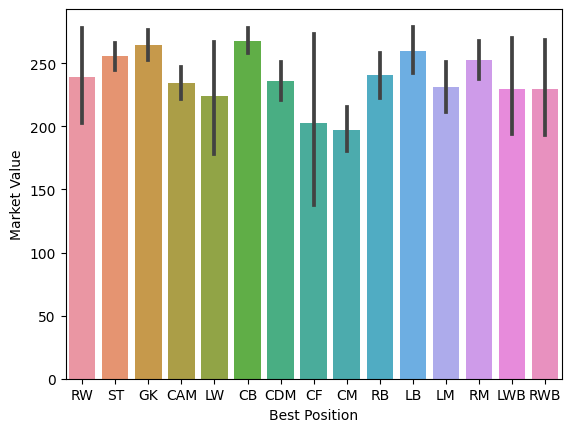

In [ ]:
#Center Backs tend to have a high market value
sns.barplot(data=data,  x='Best Position', y='Market Value')

<Axes: xlabel='Best Position', ylabel='Market Value'>

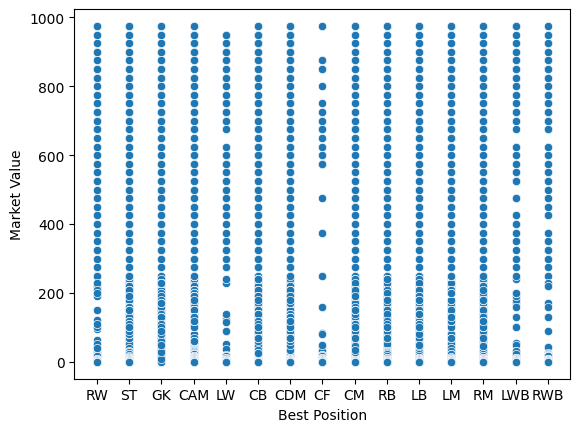

In [ ]:
sns.scatterplot(data=data,  x='Best Position', y='Market Value')

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(-200.0, 0, '−200'),
  Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200')])

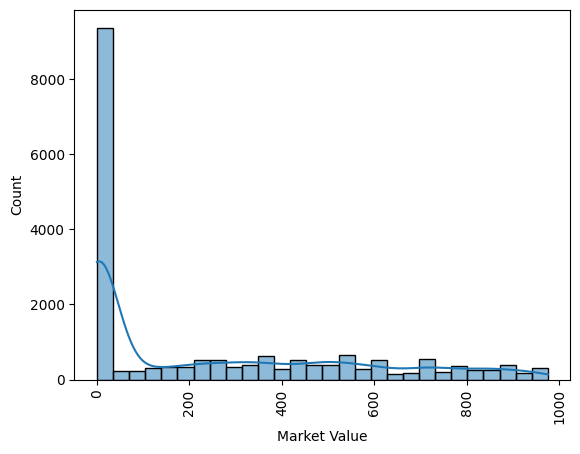

In [ ]:
#The most frequently occuring Market value bucket interval is 0.0M-49.9M
sns.histplot(data=data, x='Market Value', kde=True)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '100.0M-149.9M'),
  Text(1, 0, '50.0M-99.9M'),
  Text(2, 0, '150.0M-199.9M'),
  Text(3, 0, '0.0M-49.9M'),
  Text(4, 0, '800.0M-849.9M'),
  Text(5, 0, '950.0M-999.9M'),
  Text(6, 0, '600.0M-649.9M'),
  Text(7, 0, '450.0M-499.9M'),
  Text(8, 0, '900.0M-949.9M'),
  Text(9, 0, '750.0M-899.9M'),
  Text(10, 0, '700.0M-749.9M'),
  Text(11, 0, '500.0M-549.9M'),
  Text(12, 0, '550.0M-599.9M'),
  Text(13, 0, '250.0M-299.9M'),
  Text(14, 0, '400.0M-449.9M'),
  Text(15, 0, '200.0M-249.9M'),
  Text(16, 0, '300.0M-349.9M'),
  Text(17, 0, '850.0M-899.9M'),
  Text(18, 0, '650.0M-699.9M'),
  Text(19, 0, '350.0M-399.9M')])

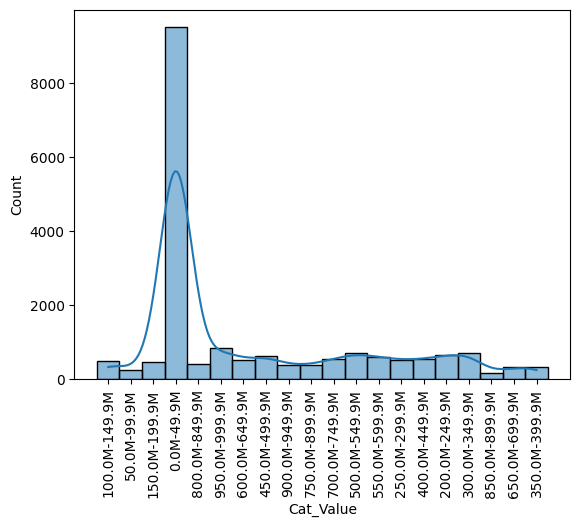

In [ ]:
#The most frequently occuring Market value bucket interval is 0.0M-49.9M
sns.histplot(data=data, x='Cat_Value', kde=True)
plt.xticks(rotation=90)

In [ ]:
#The most frequently occuring Market Value is at from 1.2-1.5
data['Market Value'].value_counts()

1.2      583
1.1      560
1.3      539
1.6      532
1.0      498
        ... 
72.5       1
61.5       1
65.5       1
67.5       1
103.5      1
Name: Market Value, Length: 243, dtype: int64

<Axes: xlabel='Skill', ylabel='Market Value'>

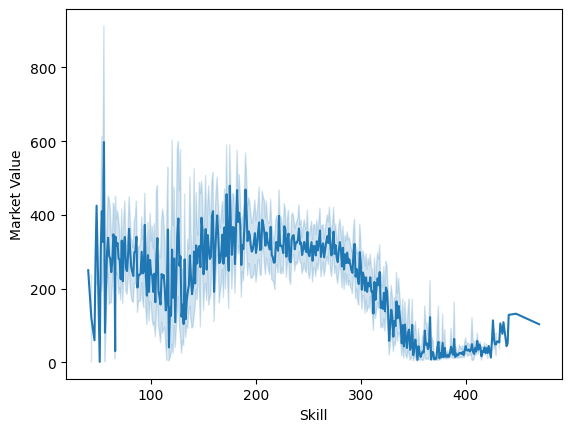

In [ ]:
sns.lineplot(data=data, x='Skill', y='Market Value')

<Axes: xlabel='International Rating', ylabel='Skill'>

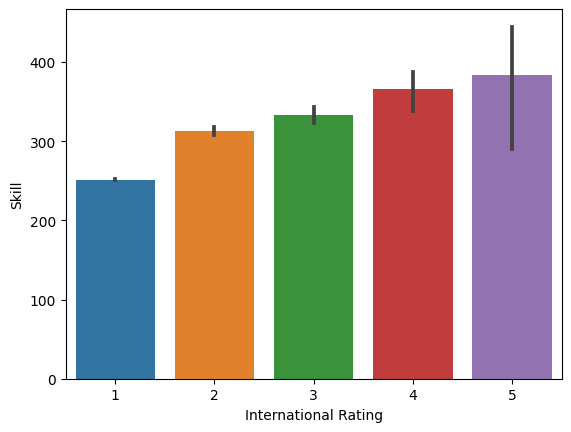

In [ ]:
#Skill has a positive relationship with International Rating
sns.barplot(data=data, x='International Rating', y='Skill')

<Axes: xlabel='International Rating', ylabel='Profile Hits'>

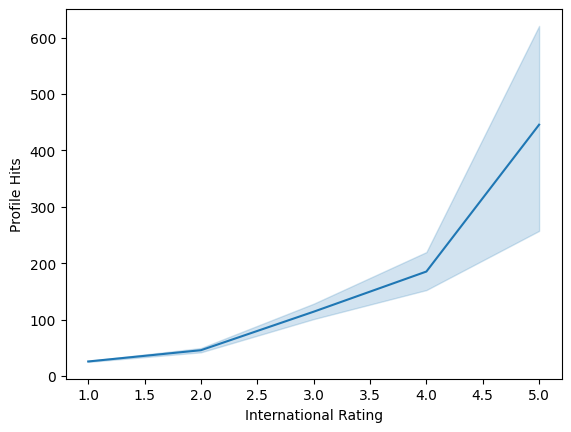

In [ ]:
#Profile Hits positively influence International Rating
sns.lineplot(data=data, x='International Rating', y='Profile Hits')

<Axes: xlabel='International Rating', ylabel='Overall Rating'>

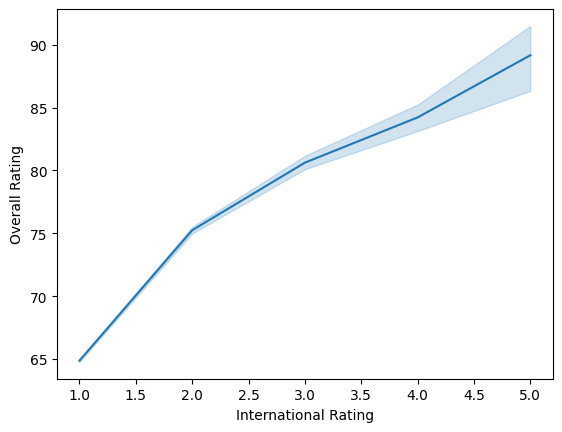

In [ ]:
#Overall Rating positively influences International Rating
sns.lineplot(data=data, x='International Rating', y='Overall Rating')

Text(0.5, 1.0, 'Relationship between Market Value and Age')

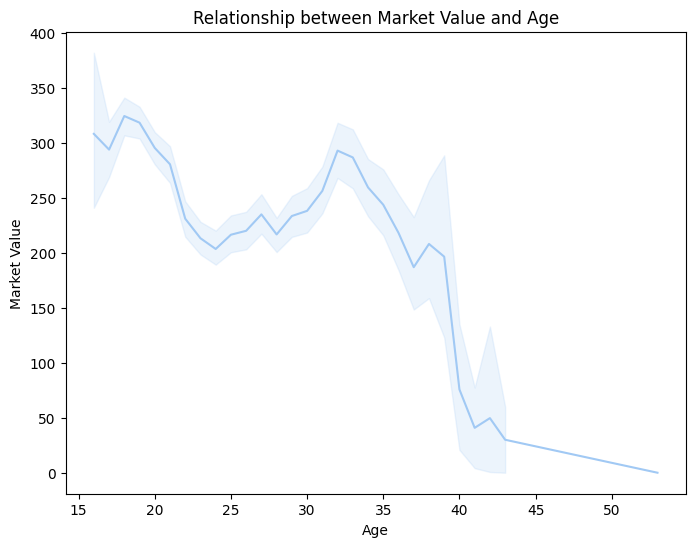

In [ ]:
#Shows that older players have a lower market value
f, ax= plt.subplots(figsize=(8,6))
sns.lineplot(data=data, x='Age', y='Market Value')
sns.set_palette("pastel")
plt.title("Relationship between Market Value and Age")

<Axes: xlabel='Player Status', ylabel='Market Value'>

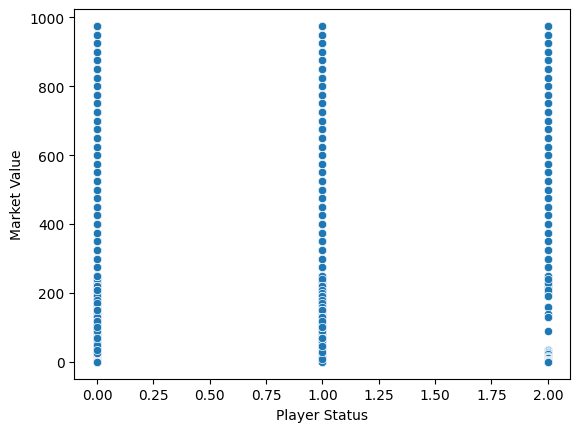

In [ ]:
#To find the relationship between Player Status and Market Value
sns.scatterplot(data=data, x='Player Status', y='Market Value')

<Axes: xlabel='Player Status'>

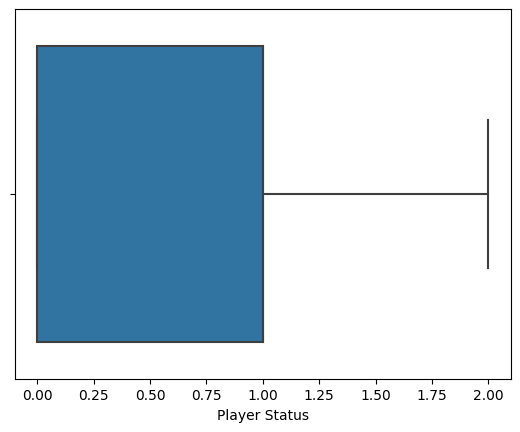

In [ ]:
sns.boxplot(data=data, x='Player Status')

<Axes: xlabel='Best Position', ylabel='International Rating'>

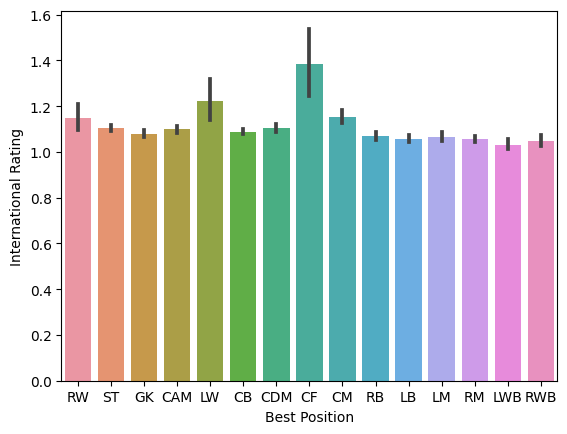

In [ ]:
sns.barplot(data=data,  x='Best Position', y='International Rating')

Text(0.5, 1.0, 'Relationship between Market Value and Release Clause')

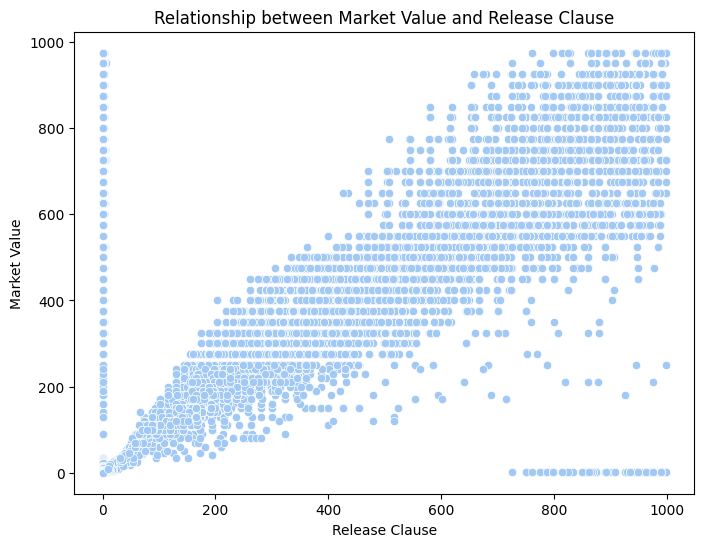

In [ ]:
#Release Clause determines market value
f, ax=plt.subplots(figsize=(8,6))
sns.scatterplot(data=data,  x='Release Clause', y='Market Value')
sns.set_palette("pastel")
plt.title("Relationship between Market Value and Release Clause")

Text(0.5, 1.0, 'Relationship between Market Value and Release Clause')

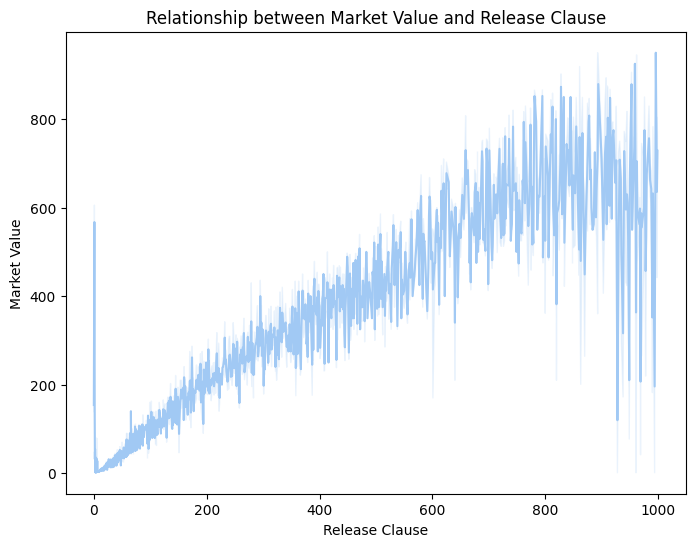

In [ ]:
f, ax=plt.subplots(figsize=(8,6))
sns.lineplot(data=data,  x='Release Clause', y='Market Value')
plt.title("Relationship between Market Value and Release Clause")

In [ ]:
outliers=np.where(data['Release Clause']>=800)
outliers=list(outliers)
len(outliers)

In [ ]:
m_count=(data['Market Value'].value_counts()>=130)
m_count

1.2       True
1.1       True
1.3       True
1.6       True
1.0       True
         ...  
65.5     False
62.5     False
56.5     False
67.5     False
103.5    False
Name: Market Value, Length: 240, dtype: bool

In [ ]:
mk=data[data['Market Value'].isin(m_count[m_count].index)]
mk

,ID,Name,Full Name,Nationality,Age,Overall Rating,Potential,Contract,Positions,Height,...,RB,RWB,ST,GK,Cat_Value,Cat_Wage,Cat_Release Clause,Player_Club,Position_count,Player Status
289,230347,Welington Dano,Welington Kauê Dano Nascimento,Brazil,20,81.0,81.0,Free,"LB, LM",178,...,0,0,0,0,0.0M-49.9M,950.0K-999.0K,0.0M-49.9M,lub,2,Free
292,230225,Juiano Mestres,Juan Everton Mestres de Mesquita,Brazil,24,81.0,81.0,Free,"CB, CDM",181,...,0,0,0,0,0.0M-49.9M,950.0K-999.0K,0.0M-49.9M,lub,2,Free
369,245299,J. Frendado,Jaime Nicolás Frendado,Uruguay,36,80.0,80.0,Free,"CB, CDM",181,...,0,0,0,0,0.0M-49.9M,950.0K-999.0K,0.0M-49.9M,lub,2,Free
374,245294,J. Serendero,Jorge Ezequiel Serendero,Uruguay,32,80.0,80.0,Free,GK,190,...,0,0,0,1,0.0M-49.9M,950.0K-999.0K,0.0M-49.9M,lub,1,Free
375,245308,M. Nérez,Mauro Evidio Nérez,Uruguay,32,80.0,80.0,Free,"LB, LM",178,...,0,0,0,0,0.0M-49.9M,950.0K-999.0K,0.0M-49.9M,lub,2,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18574,258604,N. Wojtuszek,Norbert Wojtuszek,Poland,18,52.0,73.0,2020 ~ 2023,RM,182,...,0,0,0,0,250.0M-299.9M,500.0K-549.0K,250.0M-299.9M,Górnik Zabrze,1,Active
18579,257262,A. Bredahl,Andreas Bredahl,Denmark,17,52.0,74.0,2020 ~ 2024,"CF, LW",182,...,0,0,0,0,250.0M-299.9M,500.0K-549.0K,200.0M-249.9M,FC Nordsjælland,2,Active
18593,247012,M. Tait,Michael Tait,England,19,52.0,69.0,2018 ~ 2021,ST,178,...,0,0,1,0,200.0M-249.9M,1.0K-49.0K,250.0M-299.9M,Aston Villa,1,Free
18596,248787,L. Moro,Luca Moro,Italy,19,52.0,68.0,2020 ~ 2024,ST,180,...,0,0,1,0,200.0M-249.9M,1.0K-49.0K,250.0M-299.9M,SPAL,1,Active


In [ ]:
sns.boxplot(data['Release Clause'] )

In [ ]:
data['Player_Club'].value_counts()

In [ ]:
data['Nationality'].value_counts()

In [ ]:
#To get a boolean series of countries with a value greater than or equal to 100
n_count=(data['Nationality'].value_counts()>=100)
n_count

England                 True
Germany                 True
Spain                   True
France                  True
Argentina               True
                       ...  
Malawi                 False
Rwanda                 False
São Tomé & Príncipe    False
Aruba                  False
Indonesia              False
Name: Nationality, Length: 164, dtype: bool

In [ ]:
#To get rows with countries greater than 100 occurences
filtered_data = data[data['Nationality'].isin(n_count[n_count].index)]
filtered_data

,ID,Name,Full Name,Nationality,Age,Overall Rating,Potential,Contract,Positions,Height,Weight,Best Position,Market Value,Wage,Release Clause,Skill,International Rating,Profile Hits,CAM,CB,CDM,CF,CM,LB,LM,LWB,RW,RM,RB,RWB,ST,GK,Cat_Value,Cat_Wage,Cat_Release Clause,Player_Club,Position_count,Player Status
0,158023,L. Messi,Lionel Messi,Argentina,33,93.0,93.0,2004 ~ 2021,"RW, ST, CF",170,72,RW,103.5,560.0,138.4,470.0,5,771.000000,0,0,0,1,0,0,0,0,1,0,0,0,1,0,100.0M-149.9M,550.0K-599.0K,100.0M-149.9M,FC Barcelona,3,Free
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92.0,92.0,2018 ~ 2022,"ST, LW",187,83,ST,63.0,220.0,75.9,414.0,5,562.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,50.0M-99.9M,200.0K-249.0K,50.0M-99.9M,Juventus,2,Free
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91.0,91.0,2015 ~ 2023,"CAM, CM",181,70,CAM,129.0,370.0,161.0,441.0,4,207.000000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,100.0M-149.9M,350.0K-399.0K,150.0M-199.9M,Manchester City,2,Active
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91.0,91.0,2017 ~ 2022,"LW, CAM",175,68,LW,132.0,270.0,166.5,448.0,5,595.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,100.0M-149.9M,250.0K-299.0K,150.0M-199.9M,Paris Saint-Germain,2,Free
5,188545,R. Lewandowski,Robert Lewandowski,Poland,31,91.0,91.0,2014 ~ 2023,ST,184,80,ST,111.0,240.0,132.0,407.0,4,248.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,100.0M-149.9M,200.0K-249.0K,100.0M-149.9M,FC Bayern München,1,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,247223,Xia Ao,Ao Xia,China PR,21,47.0,55.0,2018 ~ 2022,CB,178,66,CB,100.0,1.0,70.0,142.0,1,65.710027,0,1,0,0,0,0,0,0,0,0,0,0,0,0,100.0M-149.9M,1.0K-49.0K,50.0M-99.9M,Wuhan Zall,1,Free
19017,258760,B. Hough,Ben Hough,England,17,47.0,67.0,2020 ~ 2021,CM,175,65,CAM,130.0,500.0,165.0,219.0,1,65.710027,0,0,0,0,1,0,0,0,0,0,0,0,0,0,100.0M-149.9M,500.0K-549.0K,150.0M-199.9M,Oldham Athletic,1,Free
19018,252757,R. McKinley,Ronan McKinley,England,18,47.0,65.0,2019 ~ 2020,CM,179,74,CAM,120.0,500.0,131.0,207.0,1,65.710027,0,0,0,0,1,0,0,0,0,0,0,0,0,0,100.0M-149.9M,500.0K-549.0K,100.0M-149.9M,Derry City,1,Free
19019,243790,Wang Zhen'ao,Zhen'ao Wang,China PR,20,47.0,57.0,2020 ~ 2022,RW,175,69,ST,100.0,2.0,88.0,194.0,1,65.710027,0,0,0,0,0,0,0,0,1,0,0,0,0,0,100.0M-149.9M,1.0K-49.0K,50.0M-99.9M,Dalian YiFang FC,1,Free


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43],
 [Text(0, 0, 'Argentina'),
  Text(1, 0, 'Portugal'),
  Text(2, 0, 'Belgium'),
  Text(3, 0, 'Brazil'),
  Text(4, 0, 'Poland'),
  Text(5, 0, 'France'),
  Text(6, 0, 'Germany'),
  Text(7, 0, 'Netherlands'),
  Text(8, 0, 'Senegal'),
  Text(9, 0, 'Spain'),
  Text(10, 0, 'England'),
  Text(11, 0, 'Scotland'),
  Text(12, 0, 'Korea Republic'),
  Text(13, 0, 'Italy'),
  Text(14, 0, 'Croatia'),
  Text(15, 0, 'Uruguay'),
  Text(16, 0, 'Switzerland'),
  Text(17, 0, 'Serbia'),
  Text(18, 0, 'Denmark'),
  Text(19, 0, 'Nigeria'),
  Text(20, 0, 'Norway'),
  Text(21, 0, 'Ghana'),
  Text(22, 0, 'Mexico'),
  Text(23, 0, 'Austria'),
  Text(24, 0, 'Colombia'),
  Text(25, 0, 'Chile'),
  Text(26, 0, 'Ivory Coast'),
  Text(27, 0, 'Greece'),
  Text(28, 0, 'Wal

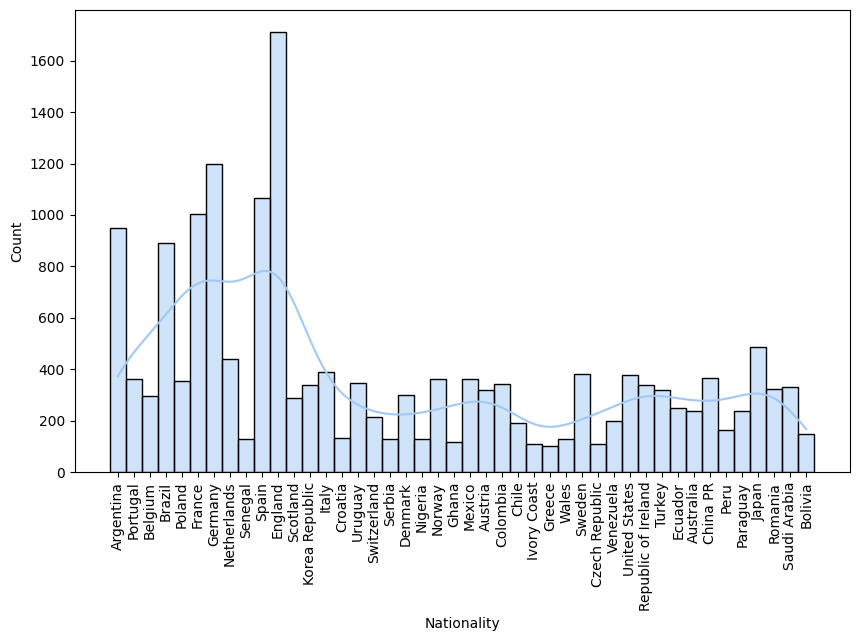

In [ ]:
f, ax=plt.subplots(figsize=(10,6))
sns.histplot(data=filtered_data, x='Nationality', kde=True)
plt.xticks(rotation=90)

(array([ 40.,  50.,  60.,  70.,  80.,  90., 100.]),
 [Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80'),
  Text(90.0, 0, '90'),
  Text(100.0, 0, '100')])

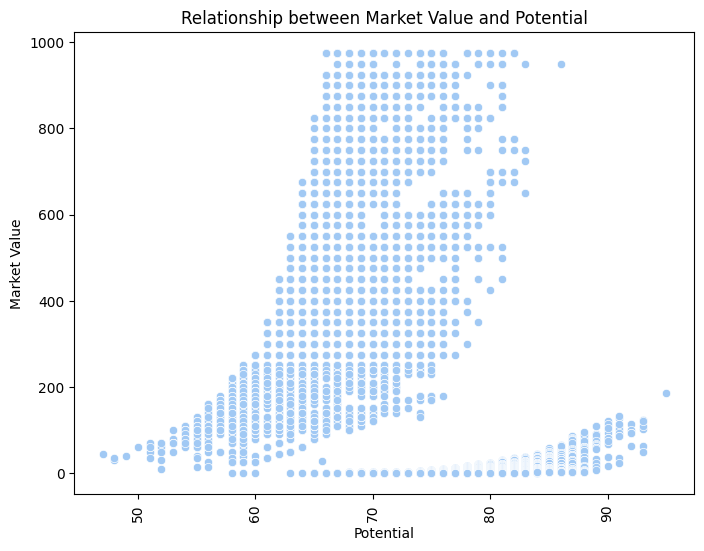

In [ ]:

f, ax=plt.subplots(figsize=(8,6))
sns.scatterplot(data=filtered_data,  x='Potential', y='Market Value')
plt.title("Relationship between Market Value and Potential")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, 'Argentina'),
  Text(1, 0, 'Portugal'),
  Text(2, 0, 'Belgium'),
  Text(3, 0, 'Brazil'),
  Text(4, 0, 'Poland'),
  Text(5, 0, 'France'),
  Text(6, 0, 'Germany'),
  Text(7, 0, 'Netherlands'),
  Text(8, 0, 'Senegal'),
  Text(9, 0, 'Spain'),
  Text(10, 0, 'England'),
  Text(11, 0, 'Scotland'),
  Text(12, 0, 'Korea Republic'),
  Text(13, 0, 'Italy'),
  Text(14, 0, 'Croatia'),
  Text(15, 0, 'Uruguay'),
  Text(16, 0, 'Switzerland'),
  Text(17, 0, 'Serbia'),
  Text(18, 0, 'Denmark'),
  Text(19, 0, 'Nigeria'),
  Text(20, 0, 'Norway'),
  Text(21, 0, 'Ghana'),
  Text(22, 0, 'Mexico'),
  Text(23, 0, 'Austria'),
  Text(24, 0, 'Colombia'),
  Text(25, 0, 'Chile'),
  Text(26, 0, 'Ivory Coast'),
  Text(27, 0, 'Greece'),
  Text(28, 0, 'Wales'),
  Text(29, 0, 'Sweden'),
  Text(30, 0, 'Czech R

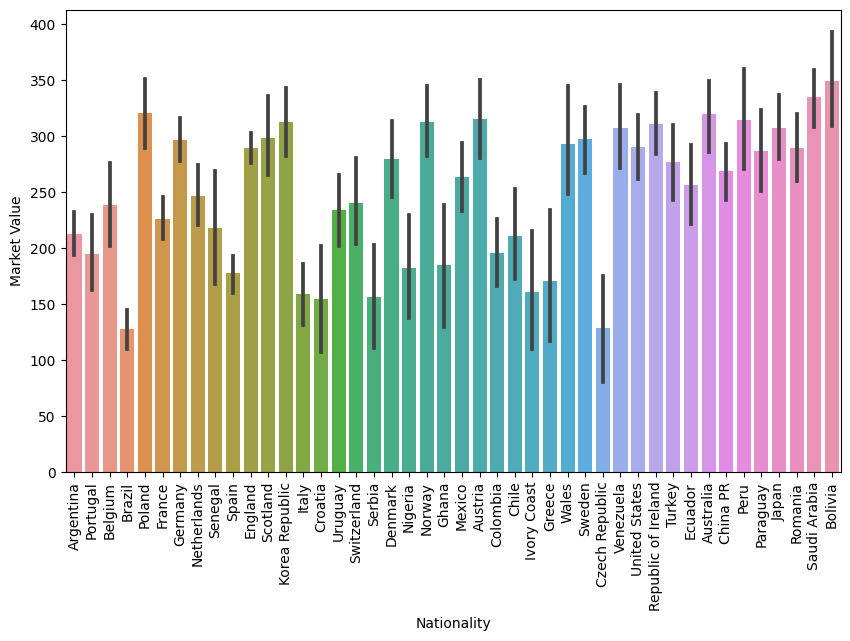

In [ ]:
f, ax=plt.subplots(figsize=(10,6))
sns.barplot(data=filtered_data,  x='Nationality', y='Market Value')
plt.xticks(rotation=90)

(array([  0., 100., 200., 300., 400., 500.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500')])

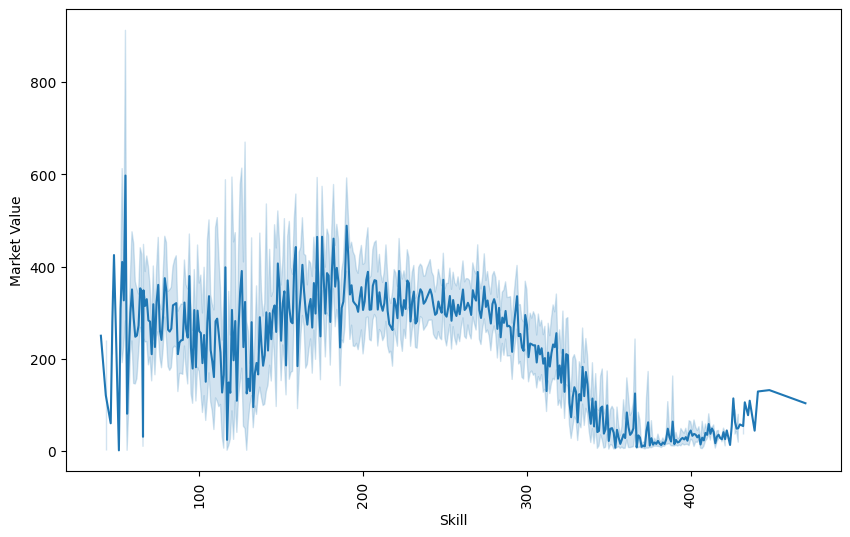

In [ ]:
f, ax=plt.subplots(figsize=(10,6))
sns.lineplot(data=filtered_data,  x='Skill', y='Market Value')
plt.xticks(rotation=90)

(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 [Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5'),
  Text(4.0, 0, '4.0'),
  Text(4.5, 0, '4.5'),
  Text(5.0, 0, '5.0'),
  Text(5.5, 0, '5.5')])

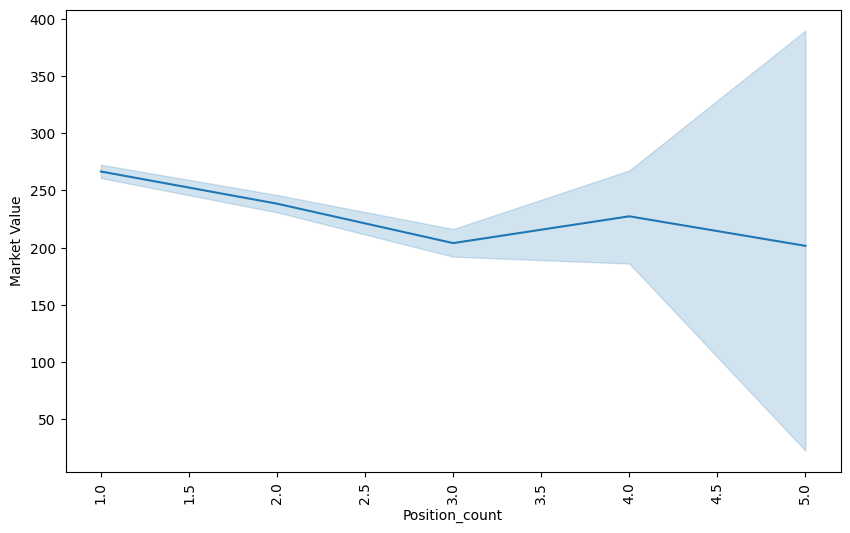

In [ ]:
f, ax=plt.subplots(figsize=(10,6))
sns.lineplot(data=data,  x='Position_count', y='Market Value')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

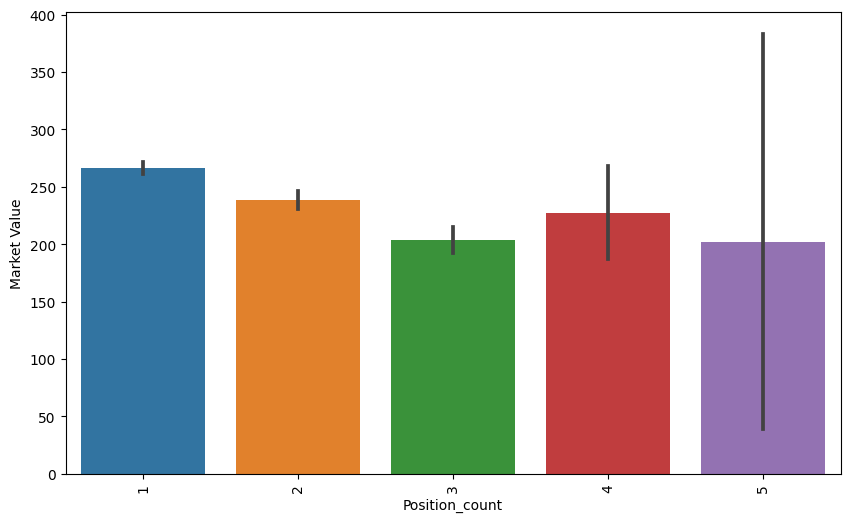

In [ ]:
f, ax=plt.subplots(figsize=(10,6))
sns.barplot(data=data,  x='Position_count', y='Market Value')
plt.xticks(rotation=90)

(array([ 40.,  50.,  60.,  70.,  80.,  90., 100.]),
 [Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80'),
  Text(90.0, 0, '90'),
  Text(100.0, 0, '100')])

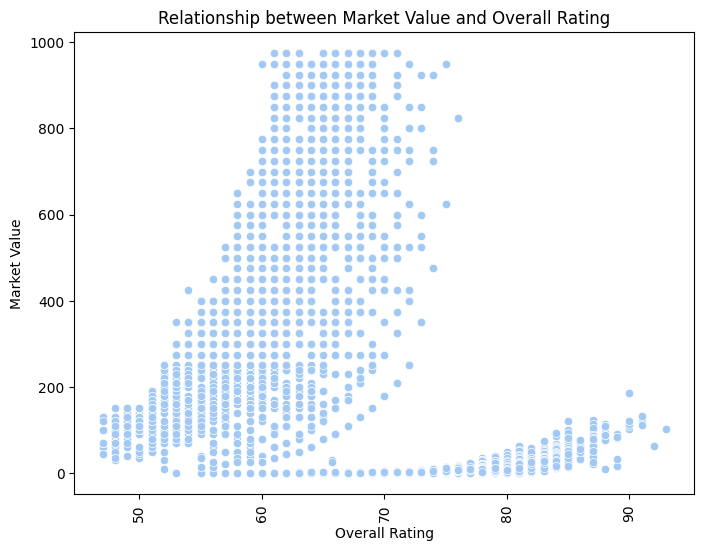

In [ ]:
f, ax=plt.subplots(figsize=(8,6))
sns.scatterplot(data=data,  x='Overall Rating', y='Market Value')
sns.set_palette("pastel")
plt.title("Relationship between Market Value and Overall Rating")
plt.xticks(rotation=90)

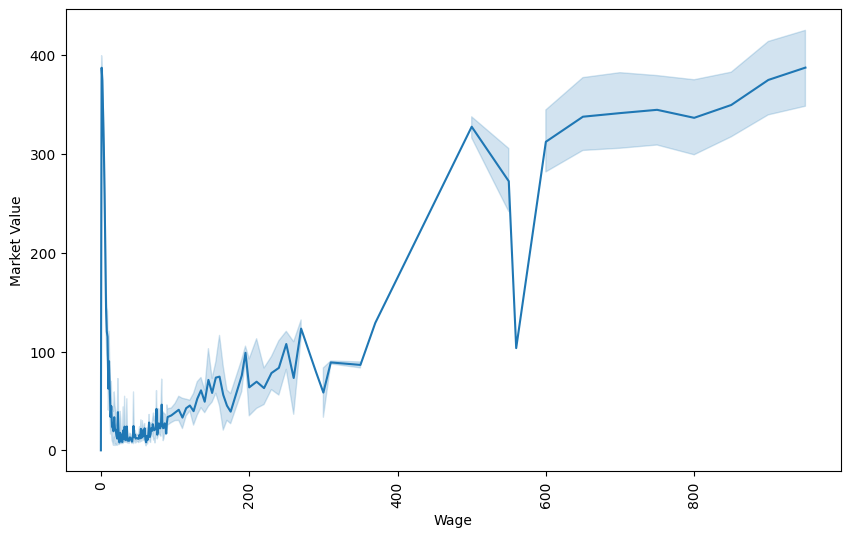

In [ ]:
f, ax=plt.subplots(figsize=(10,6))
sns.lineplot(data=data,  x='Wage', y='Market Value')
plt.xticks(rotation=90)
plt.show()

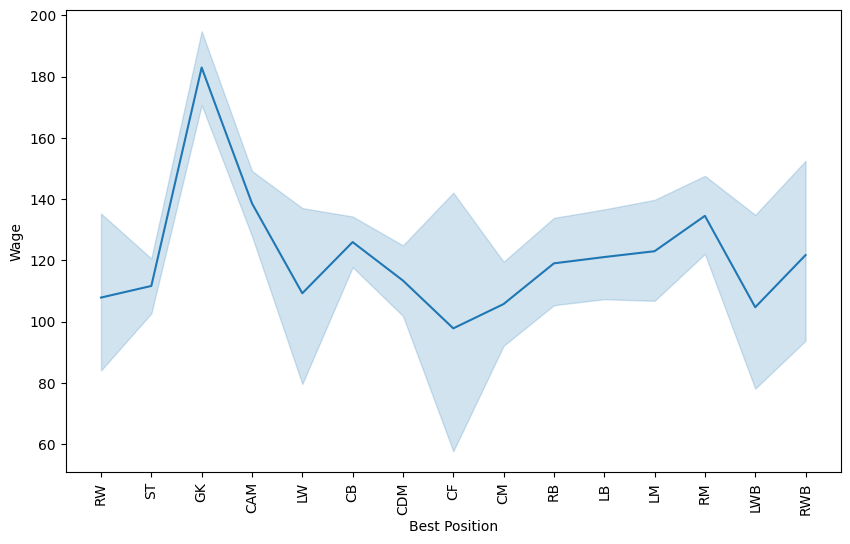

In [ ]:
f, ax=plt.subplots(figsize=(10,6))
sns.lineplot(data=data,  x='Best Position', y='Wage')
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Release Clause'>

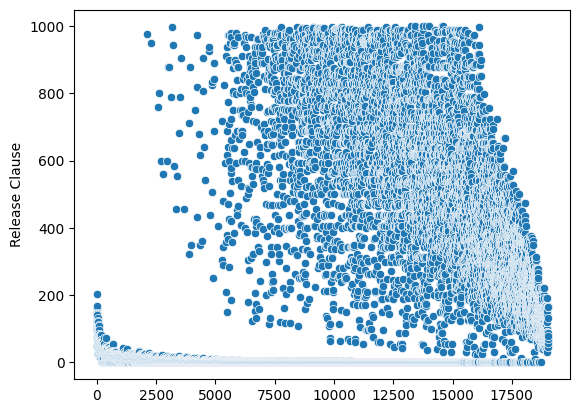

In [ ]:
#Detecting outliers
sns.scatterplot(data['Release Clause'])

MODELLING AND PREDICTION

*   Factors Affecting Market Value in this model


1.   Release Clause
2.   Age

3.   Overall Rating
4.   Potential





*  Checked for outliers
*  Removed outliers



*   Split the model into train and test data
*  Trained the prediction model using Linear Regression




*  Checked the r2score and Mean Absolute Error
*   Did the prediction and made it interactive







In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge
from ipywidgets import Dropdown, IntSlider, FloatSlider, interact


In [35]:
model_data=data[['Age','Release Clause','Overall Rating', 'Potential','Market Value']]
model_data

,Age,Release Clause,Overall Rating,Potential,Market Value
0,33,138.4,93.0,93.0,103.5
1,35,75.9,92.0,92.0,63.0
2,27,159.4,91.0,93.0,120.0
3,29,161.0,91.0,91.0,129.0
4,28,166.5,91.0,91.0,132.0
...,...,...,...,...,...
19016,21,70.0,47.0,55.0,100.0
19017,17,165.0,47.0,67.0,130.0
19018,18,131.0,47.0,65.0,120.0
19019,20,88.0,47.0,57.0,100.0


In [ ]:
#Removing Outliers in Release Clause
trim=q1, q9=model_data["Release Clause"].quantile([0.15, 0.85])
mask=model_data["Release Clause"].between(q1, q9)
trimmed_data=model_data[mask]

trimmed_data

,Age,Release Clause,Overall Rating,Potential,Market Value
0,33,138.4,93.0,93.0,103.5
1,35,75.9,92.0,92.0,63.0
2,27,159.4,91.0,93.0,120.0
3,29,161.0,91.0,91.0,129.0
4,28,166.5,91.0,91.0,132.0
...,...,...,...,...,...
19016,21,70.0,47.0,55.0,100.0
19017,17,165.0,47.0,67.0,130.0
19018,18,131.0,47.0,65.0,120.0
19019,20,88.0,47.0,57.0,100.0


<Axes: xlabel='Release Clause', ylabel='Market Value'>

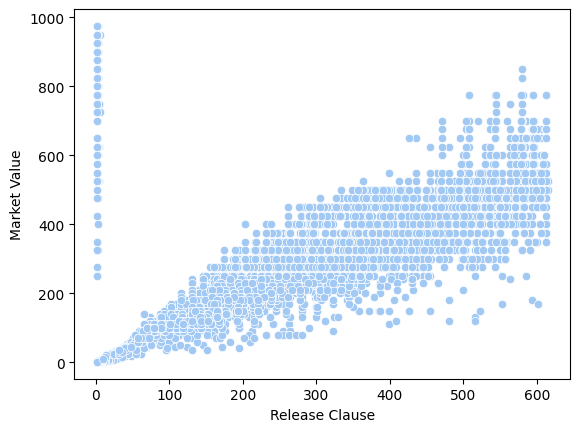

In [ ]:
#Checked that outliers have been removed
sns.scatterplot(data=trimmed_data,  x='Release Clause', y='Market Value')

In [36]:
#Removing outliers in Market Value
trim=q1, q9=model_data["Market Value"].quantile([0.2, 0.8])
mask=model_data["Market Value"].between(q1, q9)
trimmed_data=model_data[mask]


trimmed_data

,Age,Release Clause,Overall Rating,Potential,Market Value
0,33,138.4,93.0,93.0,103.5
1,35,75.9,92.0,92.0,63.0
2,27,159.4,91.0,93.0,120.0
3,29,161.0,91.0,91.0,129.0
4,28,166.5,91.0,91.0,132.0
...,...,...,...,...,...
19016,21,70.0,47.0,55.0,100.0
19017,17,165.0,47.0,67.0,130.0
19018,18,131.0,47.0,65.0,120.0
19019,20,88.0,47.0,57.0,100.0


<Axes: xlabel='Market Value'>

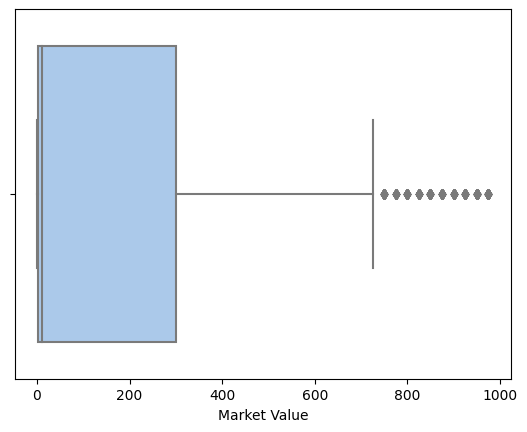

In [ ]:
sns.boxplot(data=trimmed_data,  x='Market Value')

In [37]:
trimmed_data.drop([1723, 5255, 6399], axis=0, inplace=True)

<ipython-input-37-1201a9c94e1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_data.drop([1723, 5255, 6399], axis=0, inplace=True)


<Axes: xlabel='Release Clause'>

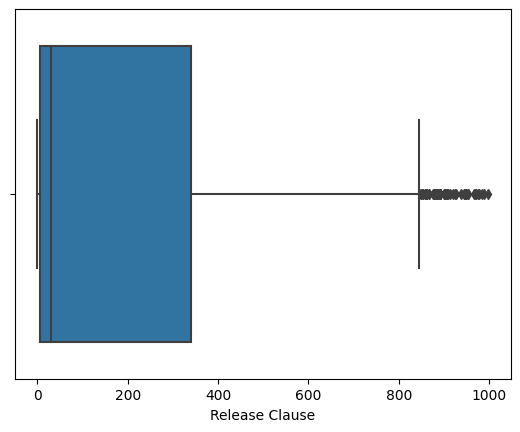

In [ ]:
sns.boxplot(data=trimmed_data,  x='Release Clause')

In [ ]:
rclause_outliers=np.where(trimmed_data['Release Clause']>850)
rclause_outliers

(array([], dtype=int64),)

In [38]:
trimmed_data.drop([2052, 2196, 2829, 2975, 3033, 3336, 3655,  4265,
        4272, 4400, 4820,
         5756, 5760, 5825, 5955,
        6826, 6844, 6903, 6958, 7143, 7462, 7702, 8446,
        8805, 8918, 9346], axis=0, inplace=True)

<ipython-input-38-a08636f7dc5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_data.drop([2052, 2196, 2829, 2975, 3033, 3336, 3655,  4265,


In [39]:
trimmed_data.drop([2033, 2175, 2796, 2827, 2933, 2988, 3272,3940,
        4093, 4196, 5238, 5270,
        5273, 5315, 5318, 5374, 5403, 5484, 6021, 6276, 6331, 6400, 7072,
        7663, 7732, 7779, 7814, 8019,
       8290, 8427, 8458, 8502, 8707, 8716], axis=0, inplace=True)

<ipython-input-39-7dfea4334967>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_data.drop([2033, 2175, 2796, 2827, 2933, 2988, 3272,3940,


In [40]:
trimmed_data.drop([2031, 2171, 2816, 2921, 2976, 3258, 3558, 3762, 3919, 4067,
        4072, 4174, 4600, 4806, 4972, 5150, 5220,
        5264, 5267, 5321, 5348, 5382, 5427, 5738, 6019, 6132,
        6149, 7003, 7615, 7950, 8036, 8586], axis=0, inplace=True)

<ipython-input-40-4d5d322b1211>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_data.drop([2031, 2171, 2816, 2921, 2976, 3258, 3558, 3762, 3919, 4067,


<Axes: xlabel='Age'>

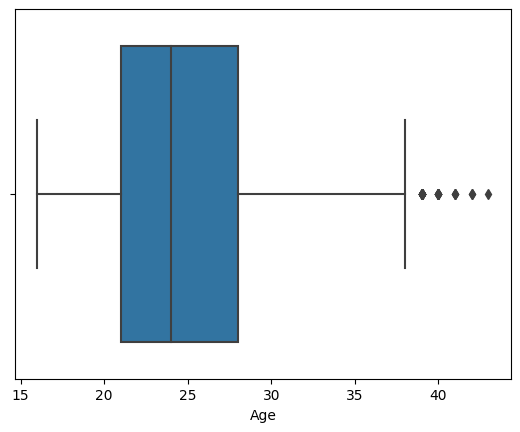

In [ ]:
#Detecting outliers in Age
sns.boxplot(data=trimmed_data,  x='Age')

In [ ]:
#Removing outliers in age
age_outliers=np.where(trimmed_data['Age']>37)
age_outliers

(array([  209,   262,   493,   873,  1588,  1770,  2139,  2189,  2588,
         2640,  2804,  2814,  3140,  3178,  3241,  3438,  3594,  3663,
         3979,  3980,  4314,  4355,  4591,  4700,  4838,  5219,  5257,
         5305,  5313,  5326,  5578,  5697,  5751,  5816,  6001,  6038,
         6129,  6360,  6425,  6466,  6591,  6595,  6602,  6716,  6748,
         6771,  6779,  6812,  6844,  6851,  6880,  6909,  6923,  6950,
         6991,  7007,  7211,  7302,  7328,  7338,  7387,  7675,  7699,
         7700,  7775,  7793,  7976,  8030,  8051,  8080,  8166,  8503,
         8706,  8959,  8995,  9124,  9291,  9720, 10166, 10415, 10480]),)

In [41]:
trimmed_data.drop([  447,   804,  1479,  1524,  1647,  1738,  2158,  2180,  2426,
         2477,  2640,  2650,  2704,   2990,  3289,
         3866,  4329,   4769,  5542,  5599,  5684,  5692,
         5711,    6293,  6480,    7265,
          7613,  7624,  7837,  7879,
          8099,  8184,
           8737,   9120,
         9251,   9595,  9999,
         10953,  11606], axis=0, inplace=True)

<ipython-input-41-60605ee5bfd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_data.drop([  447,   804,  1479,  1524,  1647,  1738,  2158,  2180,  2426,


In [42]:
trimmed_data.drop([207,   257,   478,   842,  1525,  1571,  1696,  1787,  2217,
         2239,  2489,  2712,  2722,  2780,  2893,  3373,
         3917,  3963,  4373,  4752, 4892, 5826,  6448,  6540, 7586, 8116, 8773,  9332,], axis=0, inplace=True)

<ipython-input-42-46aed67bc879>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_data.drop([207,   257,   478,   842,  1525,  1571,  1696,  1787,  2217,


In [43]:
trimmed_data.drop([ 194,   247,   476,   855,  1569,  1752,  2127, 2576,
         2628,  2798,  2810, 3179,  3242,  3441,  3993,  4331,  4372,  4617, 4734, 5229,
          5305,  5353,  5361, 5878, 6070,  6108,  6203,  6824, 6956,  6985, 7026,  7067, 7285, 8050,  8104, 9198,
         ], axis=0, inplace=True)

<ipython-input-43-76ee8efd3374>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_data.drop([ 194,   247,   476,   855,  1569,  1752,  2127, 2576,


In [44]:
trimmed_data.drop([ 209,   262,   493,   873,  1588,  1771,  2144,  2194,  2593,
         2645, 3191,   3452, 3680,
         4001,  4337,  4647, 4877,  5227,
         5303,  5350,  5358,  5799,
         6056, 6481, 6647,
         6772,  6827,  6907, 6965, 7006, 7443,
         7756, 8086,  8136,
        8762,
        10471,], axis=0, inplace=True)

<ipython-input-44-24509216e724>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_data.drop([ 209,   262,   493,   873,  1588,  1771,  2144,  2194,  2593,


In [45]:
data.drop([ 463,   839,  1549,  1727,  2096,  2145,  2538,  2589,  2752,
         2763,  3088,  3125,  3186,  3380,  3537,  3606,  3920,  3921,
         4248,  4287,  4527,  4550,  4636,  4774,  5116,  5152,  5186,
         5231,  5239,  5252,  5494,  5608,  5665,  5731,  5915,  5953,
         6044,  6269,  6334,  6375,  6498,  6502,  6509,  6622,  6654,
         6677,  6685,  6718,  6750,  6757,  6786,  6815,  6829,  6856,
         6897,  6913,  7117,  7208,  7234,  7244,  7293,  7578,  7602,
         7603,  7678,  7696,  7879,  7933,  7954,  7983,  8069,  8406,
         8609,  8862,  8898,  9027,  9194,  9623, 10069, 10318, 10383], axis=0, inplace=True)

In [46]:
data.drop([ 459,   833,  1541,  1719,  2088,  2137,  2530,  2581,  2744,
         2755,  3080,  3117,  3178,  3372,  3529,  3598,  3912,  3913,
         4240,  4279,  4519,  4542,  4628,  4766,  5108,  5144,  5178,
         5223,  5244,  5486,  5600,  5657,  5723,  5907,  5945,
         6036,  6261,  6326,  6367,  6490,  6494,  6501,  6614,  6646,
         6669, 6710,  6742,  6749,  6778,  6807,  6821,  6848,
         6889,  6904,  7108,  7199,  7225,  7235,  7284,  7569,  7593,
         7594,  7669,  7687,  7870,  7924,  7945,  7974,  8060,  8397,
         8600,  8853,  8889,  9018,  9185,  9614, 10060, 10309, 10374], axis=0, inplace=True)

In [47]:
data.drop([ 474,  848, 1555, 1729, 2089, 2138, 2525, 2571, 2729, 2739, 3043,
        3077, 3133, 3318, 3468, 3523, 3790, 3791, 4054, 4088, 4261, 4341,
        4456, 4800, 4845, 4856, 5046, 5194, 5253, 5405, 5439, 5518,
        5710, 5769, 5801, 5890, 5891, 5897, 5974, 6000, 6022, 6030, 6063,
        6095, 6102, 6131, 6160, 6173, 6200, 6241, 6256, 6459, 6550, 6576,
        6586, 6635, 6923, 6947, 6948, 7023, 7041, 7224, 7278, 7299, 7328,
        7414, 7751, 8207, 8243, 8372, 8539, 8968, 9414, 9663, 9728], axis=0, inplace=True)

In [48]:
data.drop([457,   830,  1537,  1715,  2080,  2129,  2522,  2573,  2732,
         2742,  3064,  3101,  3162,  3358,  3514,  3581,  3893,  3894,
         4220,  4259,  4492,  4594,  4731,  5101,  5136,  5183,  5191,
         5204,  5446,  5560,  5614,  5678,  5856,  5893,  5981,  6208,
         6273,  6314,  6438,  6442,  6449,  6562,  6594,  6617,  6625,
         6658,  6690,  6697,  6726,  6755,  6769,  6796,  6837,  6852,
         7056,  7147,  7173,  7183,  7232,  7517,  7541,  7542,  7617,
         7635,  7818,  7872,  7893,  7922,  8008,  8345,  8548,  8801,
         8837,  8966,  9133,  9562, 10008, 10257, 10322], axis=0, inplace=True)

<Axes: xlabel='Overall Rating'>

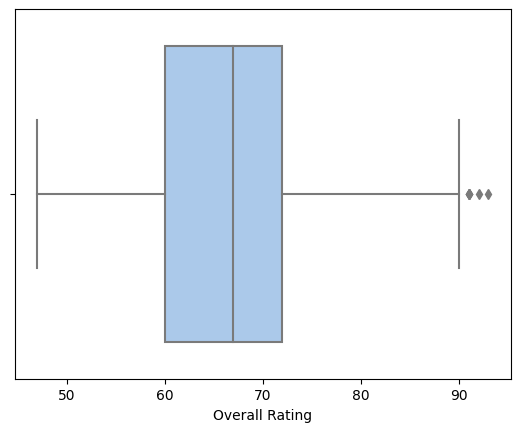

In [ ]:
#Detecting outliers in Overall Rating
sns.boxplot(data=trimmed_data,  x='Overall Rating')

In [ ]:
#Removing outliers in Overall Rating
ova_outliers=np.where(trimmed_data['Overall Rating']>90)
ova_outliers

(array([0]),)

In [49]:
trimmed_data.drop([0, 5], axis=0, inplace=True)

<ipython-input-49-1156a3e525f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_data.drop([0, 5], axis=0, inplace=True)


<Axes: xlabel='Potential'>

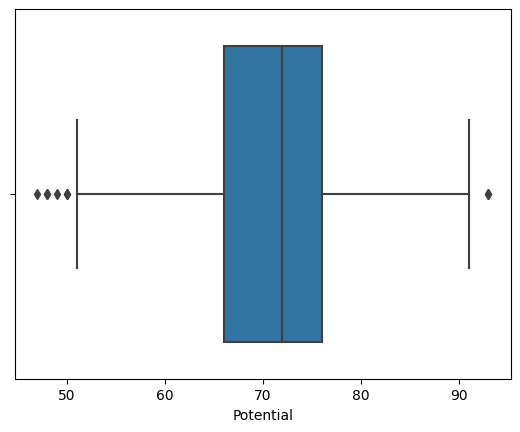

In [ ]:
#Detecting outliers in Potential
sns.boxplot(data=trimmed_data,  x='Potential')

In [ ]:
pot_outliers=np.where(trimmed_data['Potential']>90)
pot_outliers1=np.where(trimmed_data['Potential']<50)
pot_outliers

(array([  0,   1,   2,   3, 253, 333, 622, 996]),)

In [50]:
trimmed_data.drop([  1,   2,   3, 333, 622, 996], axis=0, inplace=True)

<ipython-input-50-305d236df657>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_data.drop([  1,   2,   3, 333, 622, 996], axis=0, inplace=True)


In [51]:
#To drop outliers in Potential
trimmed_data.drop([  7,    8,    9,   10,   22,
          29,   30,   65,   66,   68,   69,  104,  105,  273,  356,  650,
        1029], axis=0, inplace=True)

<ipython-input-51-282955d2f37d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_data.drop([  7,    8,    9,   10,   22,


In [52]:
trimmed_data.drop([ 252,  635, 1032], axis=0, inplace=True)

<ipython-input-52-f4a66634cadd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_data.drop([ 252,  635, 1032], axis=0, inplace=True)


In [53]:
trimmed_data.drop([13277, 13311, 13317], axis=0, inplace=True)

<ipython-input-53-69fc61385ce4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_data.drop([13277, 13311, 13317], axis=0, inplace=True)


In [54]:
trimmed_data.drop([11908, 340,  641, 1040], axis=0, inplace=True)

<ipython-input-54-5c80758e4bff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_data.drop([11908, 340,  641, 1040], axis=0, inplace=True)


In [55]:
trimmed_data.drop([ 253,  338,  638, 1036], axis=0, inplace=True)

<ipython-input-55-fb9d06190440>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_data.drop([ 253,  338,  638, 1036], axis=0, inplace=True)


In [56]:
data.drop([252,  336,  635, 1032], axis=0, inplace=True)

In [57]:
data.drop([11899, 11939, 11951], axis=0, inplace=True)

In [58]:
data.drop([  1,    2,    3,    4,   16,   23,   24,   59,   60,   62,   63,
          98,   99,  268,  355,  657, 1057], axis=0, inplace=True)

In [59]:
trimmed_data.shape

(11889, 5)

In [ ]:
trimmed_data.head(10)



,Age,Release Clause,Overall Rating,Potential,Market Value
4,28,166.5,91.0,91.0,132.0
6,28,144.3,90.0,90.0,120.5
11,28,144.3,90.0,90.0,120.5
12,28,122.0,89.0,89.0,90.5
13,28,119.0,89.0,90.0,82.0
14,34,47.9,89.0,89.0,17.5
15,32,108.7,89.0,89.0,83.5
16,34,50.2,89.0,89.0,33.5
17,32,98.1,89.0,89.0,83.5
18,25,139.6,88.0,90.0,114.5


In [60]:
target='Market Value'
features=trimmed_data.drop(columns=target).columns
y=trimmed_data[target]
x=trimmed_data[features]
print(x)
print()
print(y)

       Age  Release Clause  Overall Rating  Potential
4       28           166.5            91.0       91.0
6       28           144.3            90.0       90.0
11      28           144.3            90.0       90.0
12      28           122.0            89.0       89.0
13      28           119.0            89.0       90.0
...    ...             ...             ...        ...
19016   21            70.0            47.0       55.0
19017   17           165.0            47.0       67.0
19018   18           131.0            47.0       65.0
19019   20            88.0            47.0       57.0
19020   21            79.0            47.0       57.0

[11889 rows x 4 columns]

4        132.0
6        120.5
11       120.5
12        90.5
13        82.0
         ...  
19016    100.0
19017    130.0
19018    120.0
19019    100.0
19020    100.0
Name: Market Value, Length: 11889, dtype: float64


In [61]:
#splitting into train and test data
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [62]:
#Fitting the train data into the model
model=LinearRegression
one_hot_encoder=OneHotEncoder()
ridge=Ridge()
model=make_pipeline(one_hot_encoder, ridge)
model.fit(x_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder()), ('ridge', Ridge())])

In [63]:
x_train_predictions=model.predict(x_train)

In [64]:
#Calculating the training MAE
train_mae=mean_absolute_error(x_train_predictions, y_train)

In [65]:
print(train_mae)

29.326635504694345


In [66]:
#Fitting the test data into the model
model2=LinearRegression
one_hot_encoder=OneHotEncoder()
ridge=Ridge()
model2=make_pipeline(one_hot_encoder, ridge)
model2.fit(x_test, y_test)

Pipeline(steps=[('onehotencoder', OneHotEncoder()), ('ridge', Ridge())])

In [67]:
x_test_predictions=model2.predict(x_test)

In [68]:
#Calculating the testing MAE
test_mae=mean_absolute_error(y_test, x_test_predictions)

In [69]:
print(test_mae)

28.22578399910202


In [70]:
trimmed_data.head()

,Age,Release Clause,Overall Rating,Potential,Market Value
4,28,166.5,91.0,91.0,132.0
6,28,144.3,90.0,90.0,120.5
11,28,144.3,90.0,90.0,120.5
12,28,122.0,89.0,89.0,90.5
13,28,119.0,89.0,90.0,82.0


In [71]:
#Calculating the r2score of the train data
r2_train=r2_score(x_train_predictions, y_train)

In [72]:
#Calculating the r2score of the test data
r2_test=r2_score(x_test_predictions, y_test)

In [73]:
print(r2_train)

0.9262165410150619


In [74]:
r2_test

0.9391128070436656

In [75]:
#A function to carry out the prediction
def make_prediction(age, rclause, ova, pot):
  data3={
      'Age':[age],
      'Release Clause':[rclause],
      'Overall Rating':[ova],
      'Potential':[pot]
  }
  df=pd.DataFrame(data3)
  prediction=model.predict(df)
  prediction=round(prediction[0], 2)
  prediction_message=f"The Market Value of this player is {prediction}M Euros"
  print(prediction_message)
  return prediction

In [76]:
predicted_value=make_prediction(28,	144.3,	90.0,	90.0)


The Market Value of this player is 129.43M Euros


In [77]:
#Making it interactive

interact(
    make_prediction,
    age=IntSlider(
        min=x_train['Age'].min(),
        max=x_train['Age'].max(),
        value=x_train['Age'].mean()
    ),
    rclause=IntSlider(
        min=x_train['Release Clause'].min(),
        max=x_train['Release Clause'].max(),
        value=x_train['Release Clause'].mean()
    ),
    ova=IntSlider(
        min=x_train['Overall Rating'].min(),
        max=x_train['Overall Rating'].max(),
        value=x_train['Overall Rating'].mean()
    ),
    pot=IntSlider(
        min=x_train['Potential'].min(),
        max=x_train['Potential'].max(),
        value=x_train['Potential'].mean()
    )
);



interactive(children=(IntSlider(value=24, description='age', max=43, min=16), IntSlider(value=184, description…